In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
data = pd.read_csv("/content/drive/MyDrive/2021/2021년 미래기술 챌린지_211002/주문3월.csv")
data_april = pd.read_csv("/content/drive/MyDrive/2021/2021년 미래기술 챌린지_211005/주문데이터/1-2. 이커머스 FC주문 데이터_4월.csv")
data_may = pd.read_csv("/content/drive/MyDrive/2021/2021년 미래기술 챌린지_211005/주문데이터/1-3. 이커머스 FC주문 데이터_5월.csv")
data_june = pd.read_csv("/content/drive/MyDrive/2021/2021년 미래기술 챌린지_211005/주문데이터/1-4. 이커머스 FC주문 데이터_6월.csv")

data = data.dropna(axis = 0, how = 'any')
data_april = data_april.dropna(axis = 0, how = 'any')
data_may = data_may.dropna(axis = 0, how = 'any')
data_june = data_june.dropna(axis = 0, how = 'any')

data

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CORP_ID,REF_ORD_NO,BKG_NO,BKG_TYP,BKG_DATE,BKG_TIME,SHPR_CD,INV_AMT,ITEM_SEQ,ITEM_CD,BRAND_NM,ITEM_QTY,ITEM_AMT,IF_YN,ORDER_CRT_DATETIME,DLV_DV,REF_ITEM_SEQ,ORDER_IDX,ORDER_YN,DLVPREARRBRANCD,DLVPREARREMPNICKNM,DLVCLSFCD,DLVSUBCLSFCD,INS_ID,INS_DATE,INS_TIME,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2
1,KX007,2021030365922951,KX007210303371080,7,20210303,35521,90001441,20900.0,1,4610261043_2,조합형옵션상품,1,20900.0,N,2.021030e+13,1.0,2021030323885721,2021030323885721,Y,6427,M09,6R67,4,iNEXBatch,20210303,131425,50.0,N,경기도,광주시,경상남도,김해시
2,KX007,2021030365924361,KX007210303371081,7,20210303,35513,90001441,37900.0,1,4936599538_1,조합형옵션상품,1,37900.0,N,2.021030e+13,1.0,2021030323887981,2021030323887981,Y,6158,L32,9Y25,0,iNEXBatch,20210303,131425,53.0,N,경기도,광주시,경상남도,거제시
3,KX007,2021030365928921,KX007210303371205,7,20210303,35608,90001542,69800.0,1,3858391637_1,조합형옵션상품,1,69800.0,N,2.021030e+13,1.0,2021030323895281,2021030323895281,Y,8909,D21,1N65,1,iNEXBatch,20210303,131425,6.0,N,경기도,광주시,서울특별시,서초구
4,KX007,2021030365930451,KX007210303370967,7,20210303,35551,90001341,73700.0,1,4631307460,단일상품,1,39800.0,N,2.021030e+13,1.0,2021030323897651,2021030323897651,Y,2777,R15,3D84,1,iNEXBatch,20210303,131425,10.0,N,경기도,광주시,경기도,김포시
5,KX007,2021030365930451,KX007210303370967,7,20210303,35551,90001341,73700.0,2,2475138283,단일상품,1,15900.0,N,2.021030e+13,1.0,2021030323897661,2021030323897661,Y,2777,R15,3D84,1,iNEXBatch,20210303,131425,10.0,N,경기도,광주시,경기도,김포시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309344,KX007,2021040163699601,KX007210401807627,7,20210331,234559,90001582,43600.0,1,4789343708_1,조합형옵션상품,1,43600.0,N,2.021033e+13,1.0,2021040124264101,2021040124264101,Y,L21A,M18,6M31,1,iNEXBatch,20210401,174255,38.0,N,경기도,안산시,경상북도,경주시
309345,KX007,2021040163729011,KX007210401807628,7,20210331,234749,90001582,26000.0,1,4624612404_16,조합형옵션상품,1,26000.0,N,2.021033e+13,1.0,2021040124312901,2021040124312901,Y,1877,J16,1P45,3,iNEXBatch,20210401,174255,5.0,N,경기도,안산시,서울특별시,송파구
309346,KX007,2021040163847431,KX007210401807225,7,20210331,235454,90001582,70800.0,1,2012852981_3,조합형옵션상품,1,70800.0,N,2.021033e+13,1.0,2021040124512081,2021040124512081,Y,6114,I73,6N85,0p,iNEXBatch,20210401,174255,49.0,N,경기도,안산시,부산광역시,사하구
309347,KX007,2021040163863411,KX007210401807629,7,20210331,235554,90001582,19500.0,1,161523952_5,조합형옵션상품,1,19500.0,N,2.021033e+13,1.0,2021040124539761,2021040124539761,Y,M53P,G50,6R69,2p,iNEXBatch,20210401,174255,46.0,N,경기도,안산시,부산광역시,북구


In [67]:
col_dic = {'CORP_ID' : '창고코드', 
           'REF_ORD_NO' : '고객 주문번호', 
           'BKG_NO' : 'CJ대한통운 주문번호(예약번호)', 
           'BKG_TYP' : '주문유형',#(7: B2C출고, 8: 정상반출, 9: 불량반출) 
           'BKG_DATE' : '주문날짜',
           'BKG_TIME' : '주문시간',
           'SHPR_CD' : '고객사코드',
           'INV_AMT' : '주문금액',
           'ITEM_SEQ' : '품목순번',
           'ITEM_CD' : '품목코드',
           'BRAND_NM' : '브랜드',
           'ITEM_QTY' : '품목수량',
           'ITEM_AMT' : '품목금액',
           'IF_YN' : '수신여부',
           'ORDER_CRT_DATETIME' : '주문생성시간',
           'DLV_DV' : '택배구분',
           'REF_ITEM_SEQ' : '상품주문번호',
           'ORDER_IDX' : '중개업체 주문번호',
           'ORDER_YN' : '접수여부',
           'DLVPREARRBRANCD' : '배달예정점소코드',
           'DLVPREARREMPNICKNM' : '배달예정사원분류코드',
           'DLVCLSFCD' : '배달터미널코드',
           'DLVSUBCLSFCD' : '배달터미널 소분류코드',
           'INS_ID' : '입력자ID',
           'INS_DATE' : '입력일자(인터페이스 시간)',
           'INS_TIME' : '입력시간(인터페이스 시간)',
           'POST_ZONE' : '권역구분',
           'SPLIT_EXEC_YN' : '배송처별 주문분할여부',
           'SHPR_ADDR_1' : '송화인 주소1',
           'SHPR_ADDR_2' : '송화인 주소2',
           'CNEE_ADDR_1' : '수화인 주소1',
           'CNEE_ADDR_2' : '수화인 주소2'
           }
data.rename(columns = col_dic, inplace = True)
data_april.rename(columns = col_dic, inplace = True)
data_may.rename(columns = col_dic, inplace = True)
data_june.rename(columns = col_dic, inplace = True)
data

,창고코드,고객 주문번호,CJ대한통운 주문번호(예약번호),주문유형,주문날짜,주문시간,고객사코드,주문금액,품목순번,품목코드,브랜드,품목수량,품목금액,수신여부,주문생성시간,택배구분,상품주문번호,중개업체 주문번호,접수여부,배달예정점소코드,배달예정사원분류코드,배달터미널코드,배달터미널 소분류코드,입력자ID,입력일자(인터페이스 시간),입력시간(인터페이스 시간),권역구분,배송처별 주문분할여부,송화인 주소1,송화인 주소2,수화인 주소1,수화인 주소2
1,KX007,2021030365922951,KX007210303371080,7,20210303,35521,90001441,20900.0,1,4610261043_2,조합형옵션상품,1,20900.0,N,2.021030e+13,1.0,2021030323885721,2021030323885721,Y,6427,M09,6R67,4,iNEXBatch,20210303,131425,50.0,N,경기도,광주시,경상남도,김해시
2,KX007,2021030365924361,KX007210303371081,7,20210303,35513,90001441,37900.0,1,4936599538_1,조합형옵션상품,1,37900.0,N,2.021030e+13,1.0,2021030323887981,2021030323887981,Y,6158,L32,9Y25,0,iNEXBatch,20210303,131425,53.0,N,경기도,광주시,경상남도,거제시
3,KX007,2021030365928921,KX007210303371205,7,20210303,35608,90001542,69800.0,1,3858391637_1,조합형옵션상품,1,69800.0,N,2.021030e+13,1.0,2021030323895281,2021030323895281,Y,8909,D21,1N65,1,iNEXBatch,20210303,131425,6.0,N,경기도,광주시,서울특별시,서초구
4,KX007,2021030365930451,KX007210303370967,7,20210303,35551,90001341,73700.0,1,4631307460,단일상품,1,39800.0,N,2.021030e+13,1.0,2021030323897651,2021030323897651,Y,2777,R15,3D84,1,iNEXBatch,20210303,131425,10.0,N,경기도,광주시,경기도,김포시
5,KX007,2021030365930451,KX007210303370967,7,20210303,35551,90001341,73700.0,2,2475138283,단일상품,1,15900.0,N,2.021030e+13,1.0,2021030323897661,2021030323897661,Y,2777,R15,3D84,1,iNEXBatch,20210303,131425,10.0,N,경기도,광주시,경기도,김포시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309344,KX007,2021040163699601,KX007210401807627,7,20210331,234559,90001582,43600.0,1,4789343708_1,조합형옵션상품,1,43600.0,N,2.021033e+13,1.0,2021040124264101,2021040124264101,Y,L21A,M18,6M31,1,iNEXBatch,20210401,174255,38.0,N,경기도,안산시,경상북도,경주시
309345,KX007,2021040163729011,KX007210401807628,7,20210331,234749,90001582,26000.0,1,4624612404_16,조합형옵션상품,1,26000.0,N,2.021033e+13,1.0,2021040124312901,2021040124312901,Y,1877,J16,1P45,3,iNEXBatch,20210401,174255,5.0,N,경기도,안산시,서울특별시,송파구
309346,KX007,2021040163847431,KX007210401807225,7,20210331,235454,90001582,70800.0,1,2012852981_3,조합형옵션상품,1,70800.0,N,2.021033e+13,1.0,2021040124512081,2021040124512081,Y,6114,I73,6N85,0p,iNEXBatch,20210401,174255,49.0,N,경기도,안산시,부산광역시,사하구
309347,KX007,2021040163863411,KX007210401807629,7,20210331,235554,90001582,19500.0,1,161523952_5,조합형옵션상품,1,19500.0,N,2.021033e+13,1.0,2021040124539761,2021040124539761,Y,M53P,G50,6R69,2p,iNEXBatch,20210401,174255,46.0,N,경기도,안산시,부산광역시,북구


# 품목수량

In [68]:
data.info(), data.품목수량.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279851 entries, 1 to 309348
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   창고코드               279851 non-null  object 
 1   고객 주문번호            279851 non-null  object 
 2   CJ대한통운 주문번호(예약번호)  279851 non-null  object 
 3   주문유형               279851 non-null  int64  
 4   주문날짜               279851 non-null  int64  
 5   주문시간               279851 non-null  int64  
 6   고객사코드              279851 non-null  int64  
 7   주문금액               279851 non-null  float64
 8   품목순번               279851 non-null  int64  
 9   품목코드               279851 non-null  object 
 10  브랜드                279851 non-null  object 
 11  품목수량               279851 non-null  int64  
 12  품목금액               279851 non-null  float64
 13  수신여부               279851 non-null  object 
 14  주문생성시간             279851 non-null  float64
 15  택배구분               279851 non-null  float64
 16  상품

(None, count    279851.000000
 mean          1.307206
 std           2.398788
 min           1.000000
 25%           1.000000
 50%           1.000000
 75%           1.000000
 max         510.000000
 Name: 품목수량, dtype: float64)

In [69]:
data_april.info(), data_april.품목수량.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322694 entries, 0 to 349584
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   창고코드               322694 non-null  object 
 1   고객 주문번호            322694 non-null  object 
 2   CJ대한통운 주문번호(예약번호)  322694 non-null  object 
 3   주문유형               322694 non-null  int64  
 4   주문날짜               322694 non-null  int64  
 5   주문시간               322694 non-null  int64  
 6   고객사코드              322694 non-null  int64  
 7   주문금액               322694 non-null  float64
 8   품목순번               322694 non-null  int64  
 9   품목코드               322694 non-null  object 
 10  브랜드                322694 non-null  object 
 11  품목수량               322694 non-null  int64  
 12  품목금액               322694 non-null  float64
 13  수신여부               322694 non-null  object 
 14  주문생성시간             322694 non-null  float64
 15  택배구분               322694 non-null  float64
 16  상품

(None, count    322694.000000
 mean          1.256581
 std           1.522686
 min           1.000000
 25%           1.000000
 50%           1.000000
 75%           1.000000
 max         200.000000
 Name: 품목수량, dtype: float64)

In [70]:
data_may.info(), data_may.품목수량.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 425812 entries, 3 to 450509
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   창고코드               425812 non-null  object 
 1   고객 주문번호            425812 non-null  object 
 2   CJ대한통운 주문번호(예약번호)  425812 non-null  object 
 3   주문유형               425812 non-null  int64  
 4   주문날짜               425812 non-null  int64  
 5   주문시간               425812 non-null  int64  
 6   고객사코드              425812 non-null  int64  
 7   주문금액               425812 non-null  float64
 8   품목순번               425812 non-null  int64  
 9   품목코드               425812 non-null  object 
 10  브랜드                425812 non-null  object 
 11  품목수량               425812 non-null  int64  
 12  품목금액               425812 non-null  float64
 13  수신여부               425812 non-null  object 
 14  주문생성시간             425812 non-null  float64
 15  택배구분               425812 non-null  float64
 16  상품

(None, count    425812.000000
 mean          1.292951
 std           3.007830
 min           1.000000
 25%           1.000000
 50%           1.000000
 75%           1.000000
 max        1250.000000
 Name: 품목수량, dtype: float64)

In [71]:
data_june.info(), data_june.품목수량.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 557167 entries, 3 to 676892
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   창고코드               557167 non-null  object 
 1   고객 주문번호            557167 non-null  object 
 2   CJ대한통운 주문번호(예약번호)  557167 non-null  object 
 3   주문유형               557167 non-null  int64  
 4   주문날짜               557167 non-null  int64  
 5   주문시간               557167 non-null  int64  
 6   고객사코드              557167 non-null  int64  
 7   주문금액               557167 non-null  float64
 8   품목순번               557167 non-null  int64  
 9   품목코드               557167 non-null  object 
 10  브랜드                557167 non-null  object 
 11  품목수량               557167 non-null  int64  
 12  품목금액               557167 non-null  float64
 13  수신여부               557167 non-null  object 
 14  주문생성시간             557167 non-null  float64
 15  택배구분               557167 non-null  float64
 16  상품

(None, count    557167.000000
 mean          1.295161
 std           2.533655
 min           1.000000
 25%           1.000000
 50%           1.000000
 75%           1.000000
 max        1000.000000
 Name: 품목수량, dtype: float64)

# 품목코드

**3월**

In [ ]:
code = sorted(data.품목코드.unique())
dic = {}
for c in code:
  dic[c] = sum(data.loc[(data.품목코드 == c)].품목수량) # /sum(data.품목수량)
dic
## 품목코드별 품목수량

5320


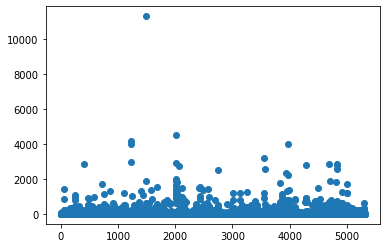

In [73]:
import matplotlib.pyplot as plt

tmp = list(dic.values())
tmp2 = list(dic.keys())

print(len(tmp))
plt.plot(np.arange(len(tmp)), tmp, 'o')


## 품목별 수량이 2000개 안쪽이며, 대부분 100~300 안쪽
## 많이 주문하는 것의 품명을 알면 납득이 될 수 있겠지만 품명 column이 빠져있어서 코드만으로 어떤 물품인지 알 수 없음..

In [74]:
import seaborn as sns
df = pd.DataFrame(tmp,columns=['코드별 총수량'])
df['품목코드'] = tmp2
df

,코드별 총수량,품목코드
0,1,1001085318
1,7,1001240388
2,23,1001284472
3,1,1001429503
4,2,1001524487
...,...,...
5315,6,735554430_6
5316,3,737440835_1
5317,3,738499058
5318,4,759422245_1


In [ ]:
date = sorted(data.주문날짜.unique())
date_dic = {}
for d in date:
  date_dic[d] = sum(data.loc[(data.주문날짜 == d)].품목수량) #/ sum(data.품목수량)
date_dic

## 주문날짜별 총수량
## 3월 23일이 유독 많은 주문량이 보임

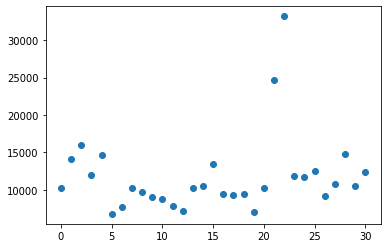

In [76]:
date_per_cnt = list(date_dic.values())
order_date = list(date_dic.keys())

plt.plot(np.arange(len(date_per_cnt)), date_per_cnt, 'o')

In [ ]:
df2 = pd.DataFrame(order_date,columns=['주문날짜'])
df2['일별수량'] = date_per_cnt
df2

(0.0, 35000.0)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_te

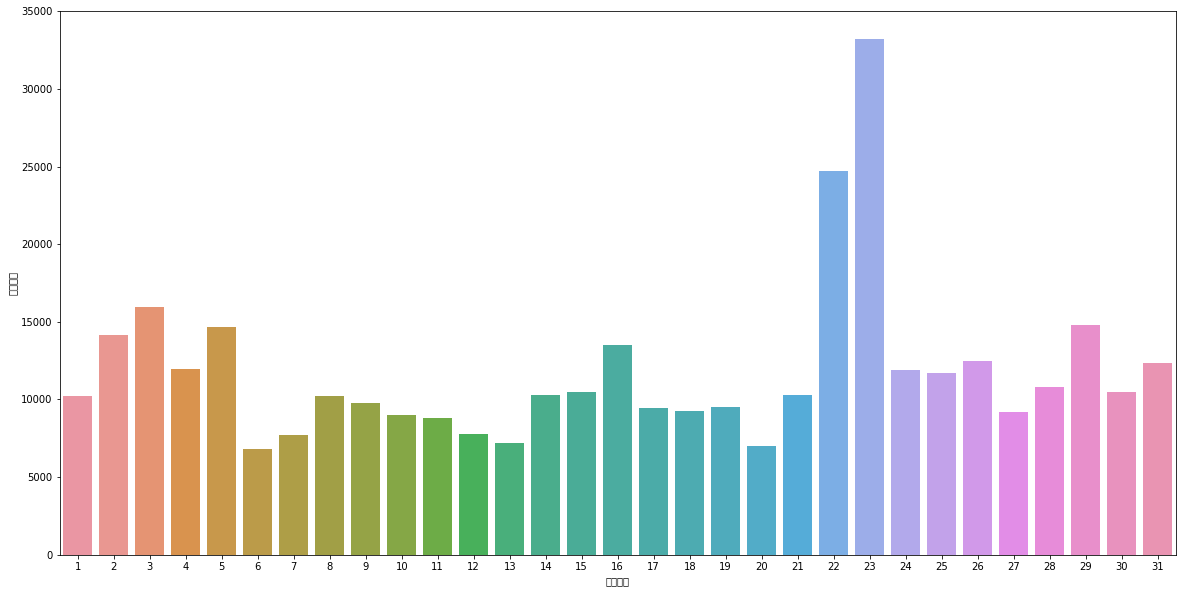

In [78]:
df2.주문날짜 = df2.주문날짜 % 100
plt.figure(figsize=(20,10))
sns.barplot(
    data= df2,
    x= "주문날짜",
    y= "일별수량"
)
plt.ylim(0, 35000)

## 22일 23일이 유독 주문이 많음 어떤 품목이 주문이 되었는지 확인해봐야 함 ==> 이틀 연속으로 주문량이 증가함
## 연속적인 증가에는 분명히 이유가 있을 것임.

**4월**

In [ ]:
code_april = sorted(data_april.품목코드.unique())
dic_april = {}
for c in code_april:
  dic_april[c] = sum(data_april.loc[(data_april.품목코드 == c)].품목수량) # /sum(data.품목수량)
dic_april
## 품목코드별 품목수량

6423


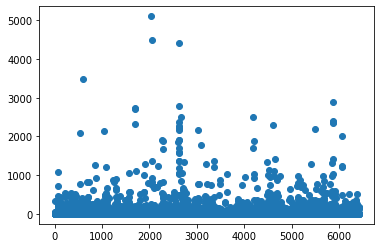

In [80]:
import matplotlib.pyplot as plt

tmp_april = list(dic_april.values())
tmp2_april = list(dic_april.keys())

print(len(tmp_april))
plt.plot(np.arange(len(tmp_april)), tmp_april, 'o')


## 품목별 수량이 2000개 안쪽
## 많이 주문하는 것의 품명을 알면 납득이 될 수 있겠지만 품명 column이 빠져있어서 코드만으로 어떤 물품인지 알 수 없음..

In [ ]:
df_april = pd.DataFrame(tmp_april,columns=['코드별 총수량'])
df_april['품목코드'] = tmp2_april
df_april

In [ ]:
date_april = sorted(data_april.주문날짜.unique())
date_april_dic = {}
for d in date_april:
  date_april_dic[d] = sum(data_april.loc[(data_april.주문날짜 == d)].품목수량) #/ sum(data.품목수량)
date_april_dic

## 주문날짜별 총수량

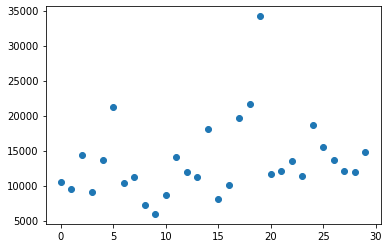

In [83]:
date_april_per_cnt = list(date_april_dic.values())
order_april_date = list(date_april_dic.keys())

plt.plot(np.arange(len(date_april_per_cnt)), date_april_per_cnt, 'o')

In [ ]:
df2_april = pd.DataFrame(order_april_date,columns=['주문날짜'])
df2_april['일별수량'] = date_april_per_cnt
df2_april

(0.0, 35000.0)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_te

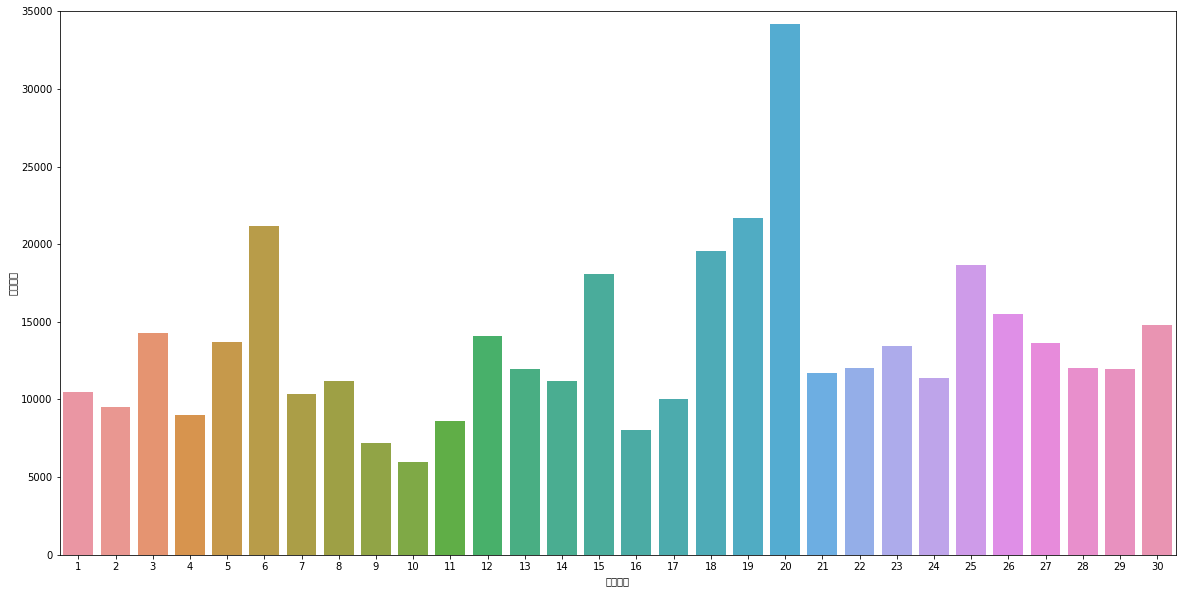

In [117]:
df2_april.주문날짜 = df2_april.주문날짜 % 100
plt.figure(figsize=(20,10))
sns.barplot(
    data= df2_april,
    x= "주문날짜",
    y= "일별수량"
)
plt.ylim(0, 35000)

## 큰 주문량을 보인 날짜

## 4월 6, 18, 19, 20 ==> 18, 19, 20 3일 연속 주문량이 증가하는 모습을 보임
## 4월 18, 19, 20 특별한 이슈 없음.

**5월**

In [ ]:
code_may = sorted(data_may.품목코드.unique())
dic_may = {}
for c in code_may:
  dic_may[c] = sum(data_may.loc[(data_may.품목코드 == c)].품목수량) # /sum(data.품목수량)
dic_may
## 품목코드별 품목수량

9189


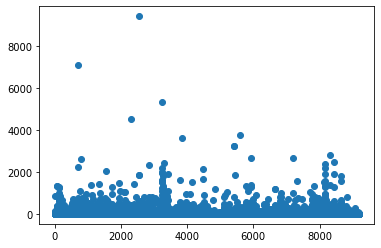

In [87]:
import matplotlib.pyplot as plt

tmp_may = list(dic_may.values())
tmp2_may = list(dic_may.keys())

print(len(tmp_may))
plt.plot(np.arange(len(tmp_may)), tmp_may, 'o')


## 품목별 수량이 2000개 안쪽이며
## 많이 주문하는 것의 품명을 알면 납득이 될 수 있겠지만 품명 column이 빠져있어서 코드만으로 어떤 물품인지 알 수 없음..

In [88]:
df_may = pd.DataFrame(tmp_may,columns=['코드별 총수량'])
df_may['품목코드'] = tmp2_may
df_may

,코드별 총수량,품목코드
0,844,0001
1,2,0003
2,2,1001240388
3,3,1001284113
4,13,1001284472
...,...,...
9184,3,shop0001457
9185,3,shop0001458
9186,1,shop0001459
9187,15,whole800001


In [ ]:
date_may = sorted(data_may.주문날짜.unique())
date_may_dic = {}
for d in date_may:
  date_may_dic[d] = sum(data_may.loc[(data_may.주문날짜 == d)].품목수량) #/ sum(data.품목수량)
date_may_dic

## 주문날짜별 총수량

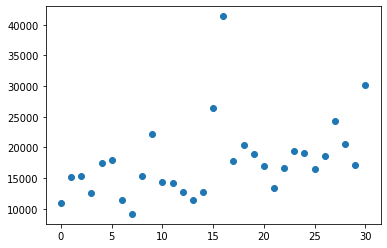

In [90]:
date_may_per_cnt = list(date_may_dic.values())
order_may_date = list(date_may_dic.keys())

plt.plot(np.arange(len(date_may_per_cnt)), date_may_per_cnt, 'o')

In [ ]:
df2_may = pd.DataFrame(order_may_date,columns=['주문날짜'])
df2_may['일별수량'] = date_may_per_cnt
df2_may

(0.0, 45000.0)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_te

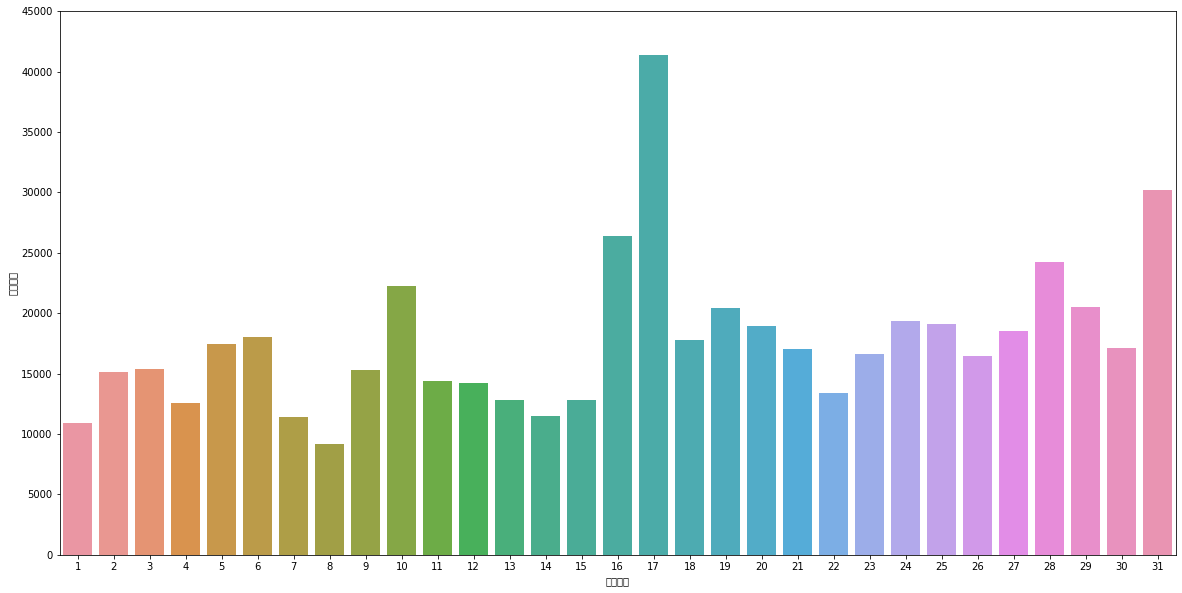

In [125]:
df2_may.주문날짜 = df2_may.주문날짜 % 100
plt.figure(figsize=(20,10))
sns.barplot(
    data= df2_may,
    x= "주문날짜",
    y= "일별수량"
)
plt.ylim(0, 45000)

## 큰 주문량이 보이는 날짜

## 5월 16, 17, 31 정도 => 16, 17 연속적으로 주문량 증가 => 5월17일 성년의 날

## 5월 5, 8, 15일 전/후로 주문이 많을 것을 예상했지만 예상과 다르게 평범한 주문량을 보임

**6월**

In [93]:
code_june = sorted(data_june.품목코드.unique())
dic_june = {}
for c in code_june:
  dic_june[c] = sum(data_june.loc[(data_june.품목코드 == c)].품목수량) # /sum(data.품목수량)
dic_june
## 품목코드별 품목수량

{'0001': 397,
 '0003': 2,
 '1001284472': 25,
 '112903777_1': 12,
 '112903777_2': 5,
 '112903777_3': 2,
 '112903777_4': 5,
 '112903777_5': 2,
 '120802614': 15,
 '120941953_3': 41,
 '120941953_4': 32,
 '121015111': 25,
 '121015149': 12,
 '121016303': 2,
 '121016312': 61,
 '121016322': 11,
 '121016347_3': 83,
 '121016535': 11,
 '121111509': 57,
 '121111522': 2,
 '121111522_1': 150,
 '121111556_10': 7,
 '121111556_16': 1,
 '121111556_17': 2,
 '121111556_30': 2,
 '121111556_31': 5,
 '121111556_32': 5,
 '121111556_33': 7,
 '121111556_34': 5,
 '121111556_36': 2,
 '121111556_37': 1,
 '121111556_39': 3,
 '121111556_43': 5,
 '121111556_44': 1,
 '121111556_45': 1,
 '121111556_5': 1,
 '121111556_50': 33,
 '121111556_51': 32,
 '121111556_52': 69,
 '121111556_53': 98,
 '121111556_54': 100,
 '121111556_55': 49,
 '121111556_56': 61,
 '121111556_57': 3,
 '121111556_58': 6,
 '121111556_59': 10,
 '121111556_60': 8,
 '121111556_61': 25,
 '121111556_62': 12,
 '121111556_63': 18,
 '121111556_64': 7,
 '12111

11458


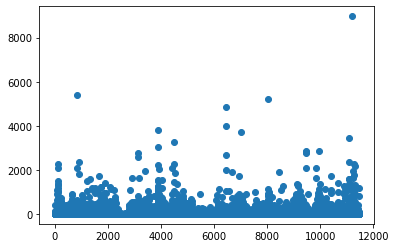

In [94]:
import matplotlib.pyplot as plt

tmp_june = list(dic_june.values())
tmp2_june = list(dic_june.keys())

print(len(tmp_june))
plt.plot(np.arange(len(tmp_june)), tmp_june, 'o')


## 품목별 수량이 2000개 안쪽
## 많이 주문하는 것의 품명을 알면 납득이 될 수 있겠지만 품명 column이 빠져있어서 코드만으로 어떤 물품인지 알 수 없음..

In [95]:
df_june = pd.DataFrame(tmp_june,columns=['코드별수량'])
df_june['품목코드'] = tmp2_june
df_june

,코드별수량,품목코드
0,397,0001
1,2,0003
2,25,1001284472
3,12,112903777_1
4,5,112903777_2
...,...,...
11453,6,shop0001678
11454,8,shop0001679
11455,3,shop0001680
11456,836,whole800001


In [96]:
date_june = sorted(data_june.주문날짜.unique())
date_june_dic = {}
for d in date_june:
  date_june_dic[d] = sum(data_june.loc[(data_june.주문날짜 == d)].품목수량) #/ sum(data.품목수량)
date_june_dic

## 주문날짜별 총수량

{20210601: 26682,
 20210602: 23774,
 20210603: 21826,
 20210604: 22385,
 20210605: 18845,
 20210606: 22050,
 20210607: 37381,
 20210608: 41589,
 20210609: 23246,
 20210610: 25759,
 20210611: 22834,
 20210612: 16285,
 20210613: 39909,
 20210614: 23081,
 20210615: 22405,
 20210616: 26087,
 20210617: 28305,
 20210618: 21867,
 20210619: 14425,
 20210620: 18933,
 20210621: 24555,
 20210622: 22126,
 20210623: 20398,
 20210624: 19547,
 20210625: 20387,
 20210626: 17753,
 20210627: 22501,
 20210628: 30753,
 20210629: 23858,
 20210630: 22075}

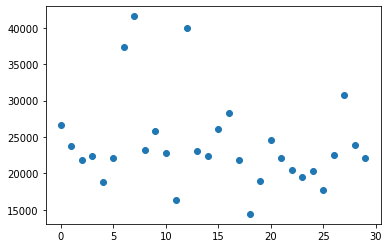

In [97]:
date_june_per_cnt = list(date_june_dic.values())
order_june_date = list(date_june_dic.keys())

plt.plot(np.arange(len(date_june_per_cnt)), date_june_per_cnt, 'o')

In [98]:
df2_june = pd.DataFrame(order_june_date,columns=['주문날짜'])
df2_june['일별수량'] = date_june_per_cnt
df2_june

,주문날짜,일별수량
0,20210601,26682
1,20210602,23774
2,20210603,21826
3,20210604,22385
4,20210605,18845
5,20210606,22050
6,20210607,37381
7,20210608,41589
8,20210609,23246
9,20210610,25759


(0.0, 45000.0)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_te

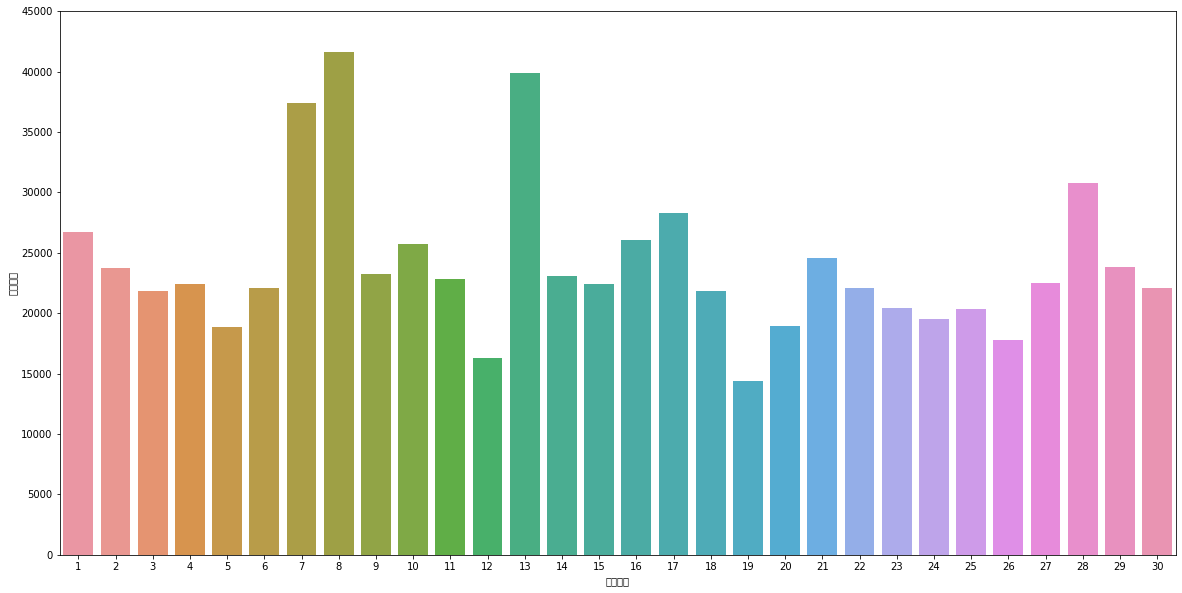

In [124]:
df2_june.주문날짜 = df2_june.주문날짜 % 100
plt.figure(figsize=(20,10))
sns.barplot(
    data= df2_june,
    x= "주문날짜",
    y= "일별수량"
)
plt.ylim(0, 45000)

## 큰 주문량이 보이는 날짜
## 6월 7, 8, 13일 + 28일 정도
 

In [116]:
total_cnt_sum = df2.일별수량[:30] + df2_april.일별수량[:30] + df2_may.일별수량[:30] + df2_june.일별수량[:30]
day_per_avg = total_cnt_sum / 4
day_per_avg

0     14569.00
1     15633.50
2     16856.50
3     13989.00
4     16158.75
5     17007.75
6     16721.50
7     18038.50
8     13885.00
9     15736.75
10    13661.00
11    13101.75
12    17980.50
13    14014.00
14    15943.75
15    18518.50
16    22304.50
17    17124.50
18    16497.25
19    19764.50
20    15890.25
21    18055.25
22    20917.50
23    15550.75
24    17462.00
25    15550.25
26    15965.25
27    19457.00
28    17782.50
29    16109.25
Name: 일별수량, dtype: float64

(0.0, 35000.0)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_te

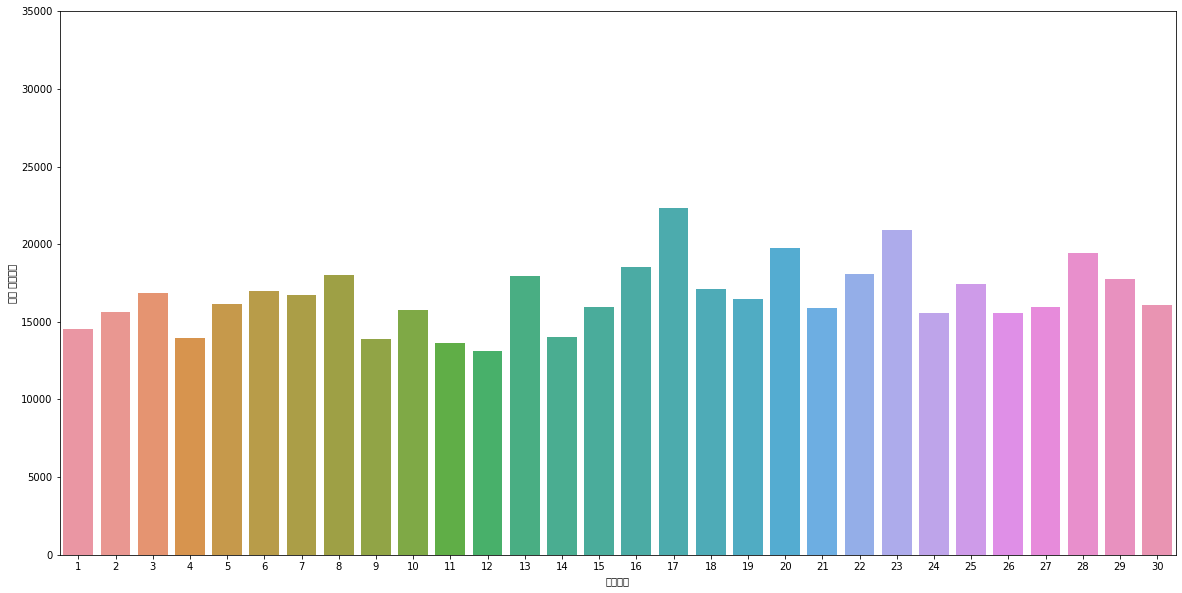

In [121]:
df2_total = pd.DataFrame([i for i in range(1,31)],columns=['주문날짜'])
df2_total['일별 평균수량'] = day_per_avg
df2_total

# df2_total.주문날짜 = df2_total.주문날짜 % 100
plt.figure(figsize=(20,10))
sns.barplot(
    data= df2_total,
    x= "주문날짜",
    y= "일별 평균수량"
)
plt.ylim(0, 35000)

## 3~6월 일별 평균수량
## 모든 날짜에 주문량이 엄청 크게 차이가 나지는 않음

In [ ]:
## 월별 주문량이 많았던 날짜

## 3월 22, 23일
## 4월 6, 18, 19, 20일 (20일 애플 이벤트)
## 5월 16, 17, 31일
## 6월 7, 8, 13, 28일

## 단정할 수는 없지만 매 달 중순경 주문량이 많아진다고 생각 할 수 있음
## 5월을 제외하고 특별한 이벤트가 없는 것으로 확인이 되었지만 한번 더 확인해 볼 필요가 있음 (5월 17일  성년의 날)

## 직장인 월급날 매달 10일 또는 25일 (관계가 있을 수 있다는 생각이 들기도 함)

In [100]:
# plt.figure(figsize=(30,20))
# sns.barplot(
#     data= df,
#     x= "품목코드",
#     y= "코드별 총수량"
# )
# plt.ylim(0, 15000)

# ## 막대그래프로 그려봤지만 보기 힘들다

In [ ]:
product_per_date = pd.DataFrame(data.loc[(data.품목수량 > 100)].주문날짜,columns=['주문날짜'])
product_per_date['품목코드'] = data.loc[(data.품목수량 > 100)].품목코드
product_per_date['품목수량'] = data.loc[(data.품목수량 > 100)].품목수량
product_per_date

## 5189275561_2, 5102624996, 5102591063, 5102599276 네 가지 품목이 여러번 주문 되었고 해당 품목은 원래 주문량이 100단위인 것으로 판단

In [ ]:
data.loc[(data.품목수량 > 100)].주문날짜